# Notas e Exercícios de Aula - #01
# MAC5768 - Visão e Processamento de Imagens - IME-USP
### 1º Semestre 2024
### Prof. Ronaldo Fumio Hashimoto
#### Marcus V. F. Laranjeira # USP 5383459

#### _mvlaran@usp.br_

Notas e exercícios baseados no conteúdo da aula de 29/02/2024 - Capítulos 1 e 2 do Livro Texto

In [39]:
import tifffile as tiff
import matplotlib.pyplot as plt
import numpy as np
import random

In [40]:
# Caminho da imagem
caminho_imagem = './imagens/standard_test_images/house.tif'

In [41]:
# Carrega a imagem como um array
imagem = tiff.imread(caminho_imagem)

print(imagem.shape)

<tifffile.TiffTag 338 @524910> raised ValueError('999 is not a valid EXTRASAMPLE')


(512, 512, 2)


In [42]:
# A biblioteca traz a imagem num array tridimencional, precisamos apenas da primeira camada
# Mantém apenas a primeira camada
imagem = imagem[:,:,0]

In [43]:
print(imagem.dtype)

uint8


In [44]:
# O tipo de dado uint8 acomoda os inteiros sem sinal (unsigned 8 bit), que vão de 0 a 255.
# Para fins deste estudo, altero o tipo para int32 de forma à ter que fazer manualmente qualquer tipo de 
# cálculo após operações
imagem = imagem.astype(np.int32)

In [45]:
# Função para exibir a imagem
def exibe_imagem(img):
    # cmap='gray' necessário para exibir em preto e branco e vmin e vmax fixam 0 e 255 
    # respectivamente para não haver escala de intensidades pelo próprio matplotlib
    plt.imshow(img, cmap='gray', vmin = 0, vmax = 255) 
    plt.axis('off')  # Desliga os eixos
    plt.show()

In [46]:
# Função para exibir três imagens lado a lado
def exibe_tres_imagens(img1, img2, img3):
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # Cria uma figura com 3 subplots lado a lado

    # Subplot 1
    axs[0].imshow(img1, cmap='gray', vmin = 0, vmax = 255)
    axs[0].axis('off')
    
    # Subplot 2
    axs[1].imshow(img2, cmap='gray', vmin = 0, vmax = 255)
    axs[1].axis('off')
    
    # Subplot 3
    axs[2].imshow(img3, cmap='gray', vmin = 0, vmax = 255)
    axs[2].axis('off')
    
    plt.show()

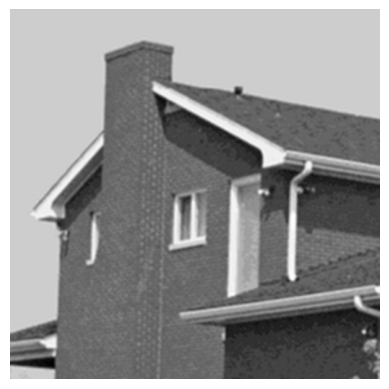

In [47]:
exibe_imagem(imagem)

### Operações Aritiméticas com Imagens

As operações abaixo podem ser feitas de formas mais simples, usando por exemplo np.clip entre outras formas, mas para fins didáticos, fiz da forma abaixo.

### Soma

In [48]:
imagem_soma = imagem + 100
print(np.max(imagem_soma))
print(np.min(imagem_soma))

354
100


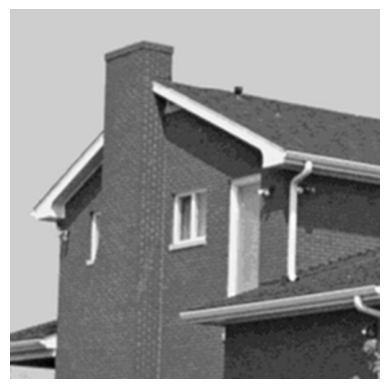

255.0
0.0


In [49]:
im_escala_soma = ((imagem_soma - np.min(imagem_soma)) / np.max(imagem_soma - np.min(imagem_soma))) * 255

exibe_imagem(im_escala_soma)

print(np.max(im_escala_soma))
print(np.min(im_escala_soma))

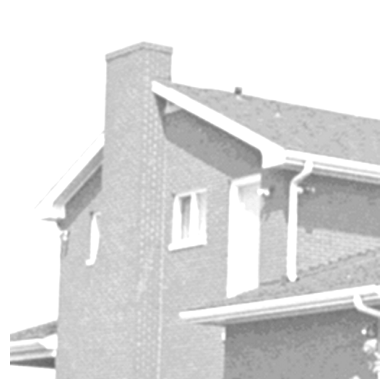

255
100


In [51]:
im_trunc_soma = np.where(imagem_soma < 0, 0, np.where(imagem_soma > 255, 255, imagem_soma))

exibe_imagem(im_trunc_soma)

print(np.max(im_trunc_soma))
print(np.min(im_trunc_soma))

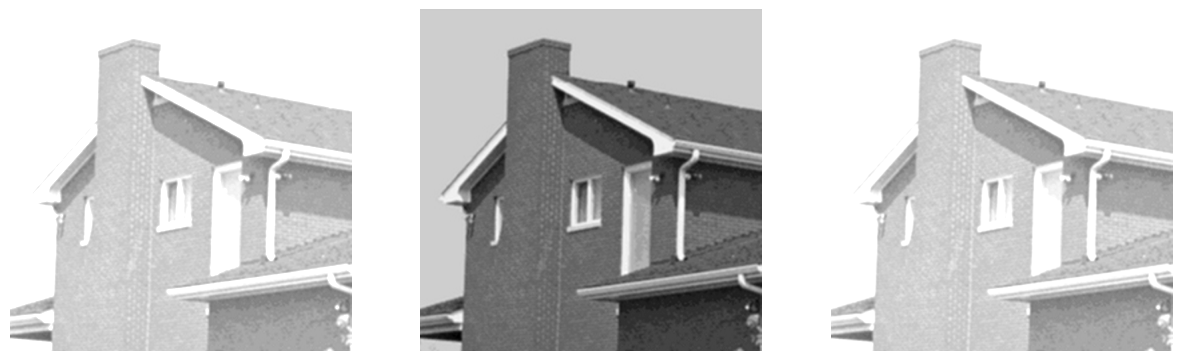

In [13]:
exibe_tres_imagens(imagem_soma, im_escala_soma, im_trunc_soma)

### Subtração

In [57]:
imagem_subtracao = imagem - 100
print(np.max(imagem_subtracao))
print(np.min(imagem_subtracao))

154
-100


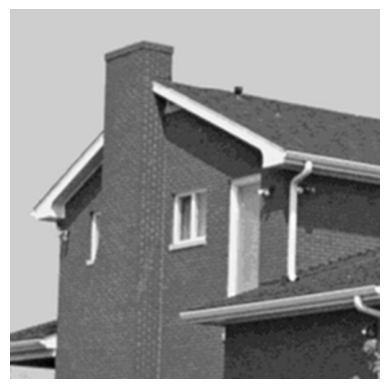

255.0
0.0


In [58]:
im_escala_subtracao = ((imagem_subtracao - np.min(imagem_subtracao)) / np.max(imagem_subtracao - np.min(imagem_subtracao))) * 255

exibe_imagem(im_escala_subtracao)

print(np.max(im_escala_subtracao))
print(np.min(im_escala_subtracao))

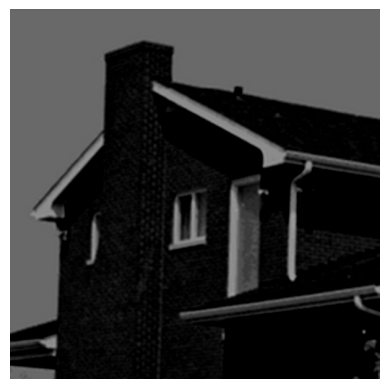

154
0


In [59]:
im_trunc_subtracao = np.where(imagem_subtracao < 0, 0, np.where(imagem_subtracao > 255, 255, imagem_subtracao))

exibe_imagem(im_trunc_subtracao)
print(np.max(im_trunc_subtracao))
print(np.min(im_trunc_subtracao))

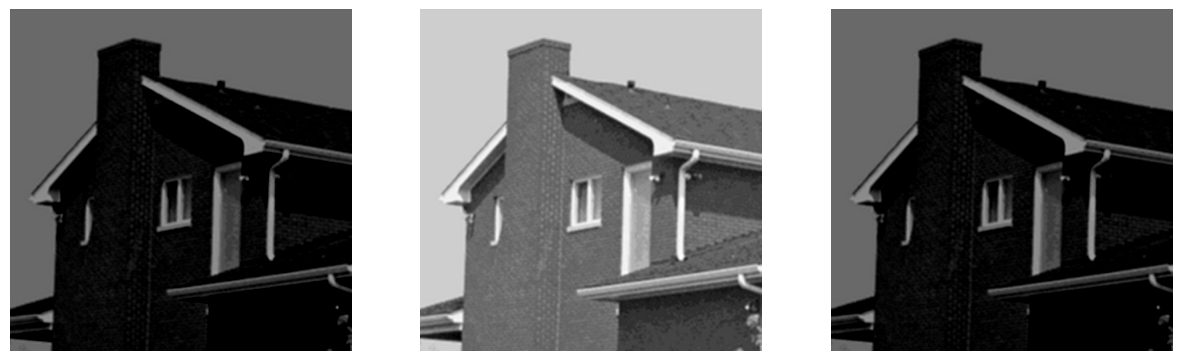

In [17]:
exibe_tres_imagens(imagem_subtracao, im_escala_subtracao, im_trunc_subtracao)

### Multiplicação

In [18]:
imagem_multiplicacao = imagem * 2
print(np.max(imagem_multiplicacao))
print(np.min(imagem_multiplicacao))

508
0


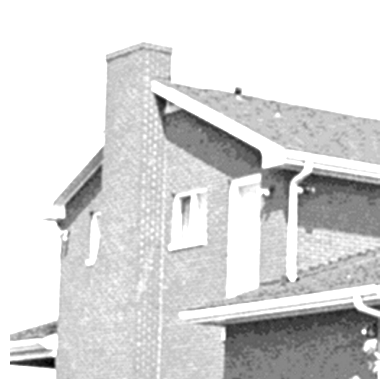

In [19]:
im_escala_multiplicacao = ((imagem_multiplicacao - np.min(imagem_multiplicacao)) / np.max(imagem_multiplicacao - np.min(imagem_multiplicacao))) * 255

exibe_imagem(imagem_multiplicacao)

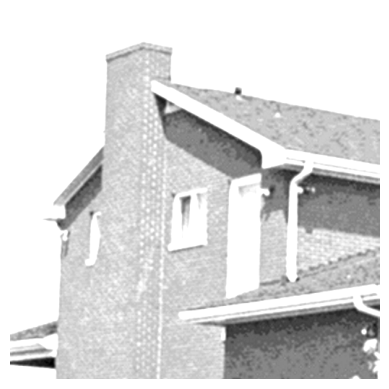

In [20]:
im_trunc_multiplicacao = np.where(imagem_multiplicacao < 0, 0, np.where(imagem_multiplicacao > 255, 255, imagem_multiplicacao))

exibe_imagem(im_trunc_multiplicacao)

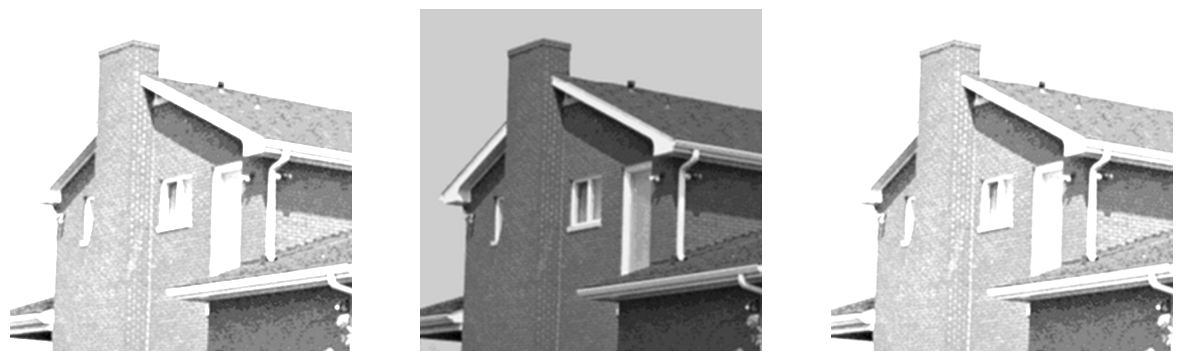

In [21]:
exibe_tres_imagens(imagem_multiplicacao, im_escala_multiplicacao, im_trunc_multiplicacao)

### Divisão

In [22]:
imagem_divisao = imagem / 20
print(np.max(imagem_divisao))
print(np.min(imagem_divisao))

12.7
0.0


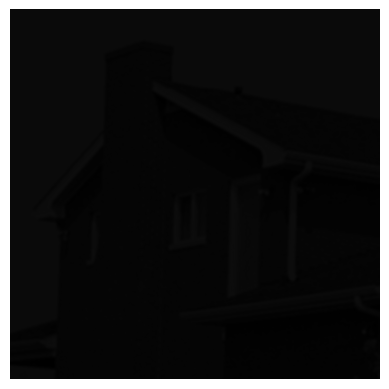

In [23]:
im_escala_divisao = ((imagem_divisao - np.min(imagem_divisao)) / np.max(imagem_divisao - np.min(imagem_divisao))) * 255

exibe_imagem(imagem_divisao)

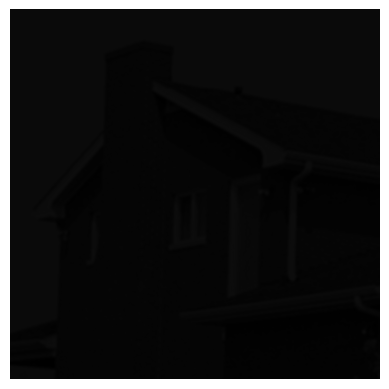

In [24]:
im_trunc_divisao = np.where(imagem_divisao < 0, 0, np.where(imagem_divisao > 255, 255, imagem_divisao))

exibe_imagem(im_trunc_divisao)



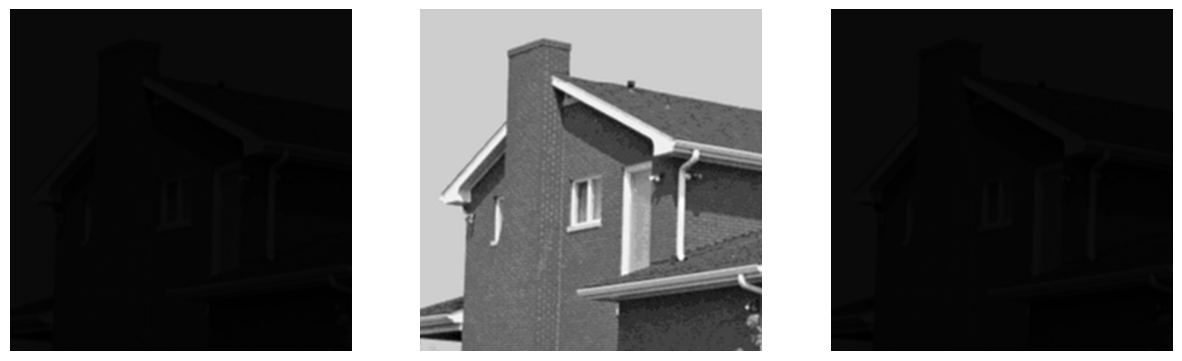

In [25]:
exibe_tres_imagens(imagem_divisao, im_escala_divisao, im_trunc_divisao)

## Estudo da média de imagens para redução de ruído

Para este exercício, foi utilizada uma imagem sem ruído, então criou-se 100 cópias e utilizando Photoshop, foi adicionado ruído gaussiano (intensidade = 25%) individualmente. 

Após isso, carregou-se as 100 imagens em memória e criou-se uma imagem com a média das 10 primeiras imagens, uma imagem com a média das 25 primeiras imagens, respectivamente para 50 primeiras imagens e então com as 100 imagens.

O resultado é o esperado, a medida que aumentamos as imagens, a imagem resultante da média das imagens se aproxima da imagem original sem ruído.

In [26]:
# Caminho para as imagens do teste de ruido
caminho_ruido = "./Imagens/teste_ruido/"

# Lista para armazenar as imagens
images = []

# Carregar os 100 arquivos de imagem
for i in range(1, 101):
    filename = caminho_ruido + f"noisy_{i:03d}.tif"
    img = tiff.imread(filename)
    images.append(img)

In [27]:
# Converter a lista de imagens para um array numpy
images_array = np.array(images)

# Calcular as médias das imagens para 10, 25, 50 e 100 imagens
averages = {}
for n in [10, 25, 50, 100]:
    average_img = np.mean(images_array[:n], axis=0).astype(np.uint8)
    averages[n] = average_img

### Imagem original

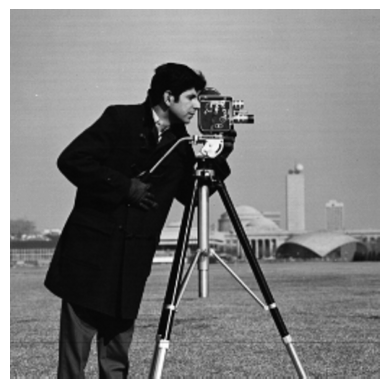

In [28]:
original_sem_ruido = caminho_ruido + "cameraman.tif"
imagem_sem_ruido = tiff.imread(original_sem_ruido)

exibe_imagem(imagem_sem_ruido)

### Exemplos da Imagem com ruído adicionado

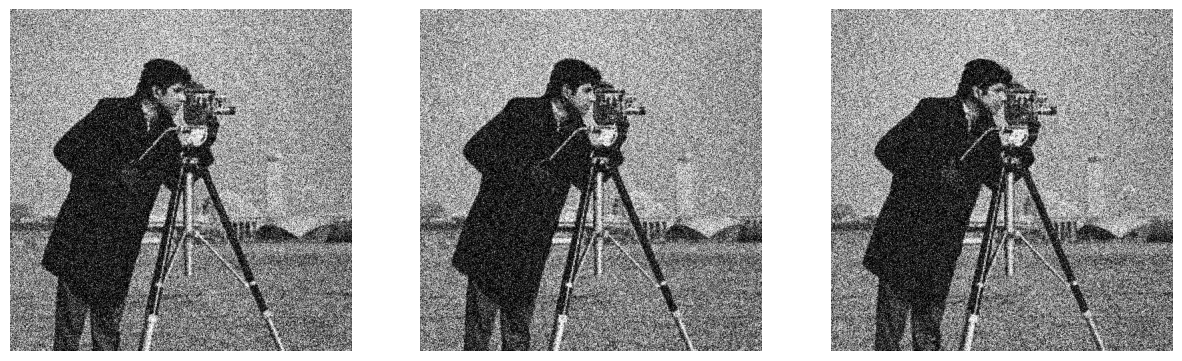

In [30]:
exibe_tres_imagens(images_array[random.randint(1, 33)],
                   images_array[random.randint(34, 66)],
                   images_array[random.randint(67, 100)])

## Média das 10 primeiras imagens

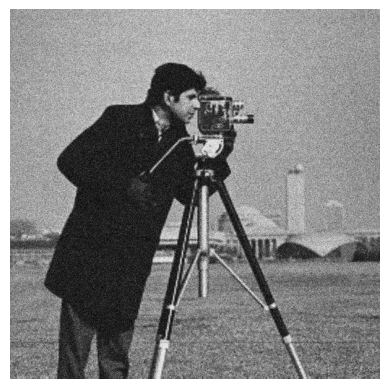

In [31]:
exibe_imagem(averages[10])

## Média das 25 primeiras imagens

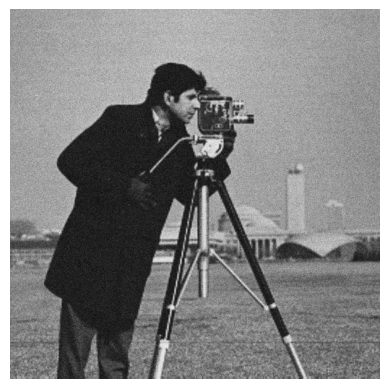

In [32]:
exibe_imagem(averages[25])

## Média das 50 primeiras imagens

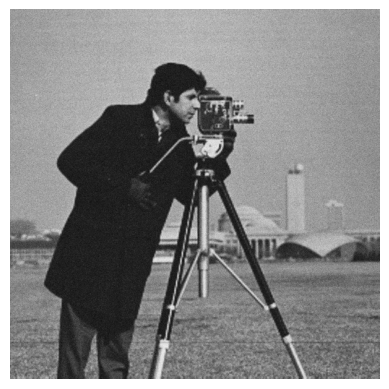

In [33]:
exibe_imagem(averages[50])

## Média de todas as 100 imagens

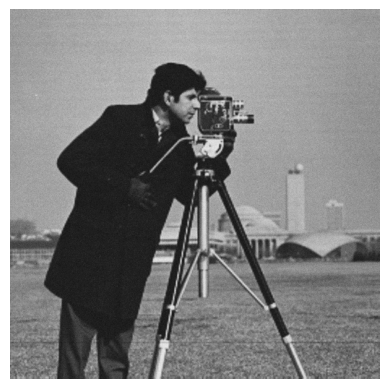

In [34]:
exibe_imagem(averages[100])